La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Identifica patrones que determinen si un juego tiene éxito o no. Para poder detectar proyectos prometedores y planificar campañas publicitarias.

## Cargo datos

In [ ]:
#importo librerías que posiblemente utilice

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
from math import factorial
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import ttest_ind


In [2]:
#lectura del df
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
print(df_games)

                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Ot

In [4]:
#Descripción del df: 
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
display(df_games.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Primeras observaciones:

* Modificar los nombres de las columnas: todos a minúscula.
* Year of release es un float, debe transformarse a object.
* Critic score es float y puede que deba ser transformado a int: va a depender de cuáles son los valores dentro del mismo.
* User score aparece como object, debe ser transformado a int u object.
* Se ven datos faltantes en algunas columnas: esto se debe a valores nulos. La cantidad en algunas de ellas es muy grande.




## Preparar los datos

In [6]:
#función para pasar todos los nombres de las columnas a minúscula

column_low = []

for columna in df_games:
    columna = columna.lower()
    column_low.append(columna)
    
df_games.columns = column_low

display(df_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
#cantidad de nulos y duplicados

print('cantidad de nulos:', df_games.isna().sum())
print('cantidad de duplicados:', df_games.duplicated().sum())


cantidad de nulos: name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
cantidad de duplicados: 0


La cantidad de datos nulos en las columnas puede deberse a: problemas técnicos de la plataforma o humanos, es decir personas que no han registrado dichos datos. Son demasiados en algunas columnas alrededor del 50%. Se debe observar si los mismos tienen algo en común para poder determinar sus causas. De lo contrario puede ser, como mencioné anteriormente conjunto de fallas del sistema sumado a errores humanos.


In [8]:
#Identifico los dos nulos en la columna 'name'
name_null = df_games[df_games['name'].isnull()]
print(name_null)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [9]:
#Identifico los dos nulos en la columna 'genre'
genre_null = df_games[df_games['genre'].isnull()]
print(genre_null)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [10]:
df_games.drop(df_games[df_games['name'].isnull()].index, inplace=True)
#reseteo del index:
df_games.reset_index(drop=True, inplace=True)

Teniendo un total de 16715, se han encontrados dos nulos en la columna 'genre', que coinciden con los de la columna 'name': de la plataforma 'GEN' lanzados en 1993. Se opta por eliminarlos ya que no alterarán los resultados de lo que se está analizando en este momento.

In [11]:
#compruebo los datos fueron eliminados

#print(df_games.isna().sum())

In [12]:
#Busco si algun año en particular es el que esta como nan en la columna
print(df_games['year_of_release'].sort_values().unique())

[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]


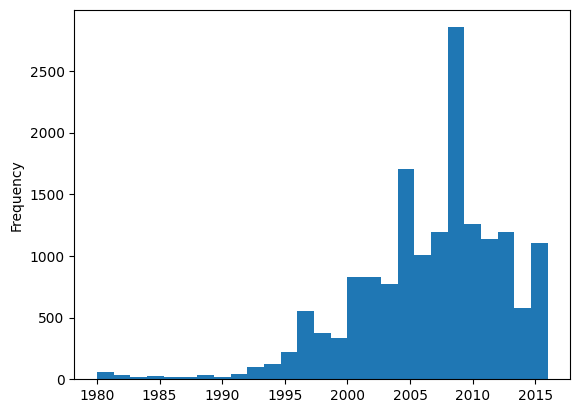

In [13]:
#checkeo como se observa el grafico de años.
df_games['year_of_release'].plot(kind='hist',bins=27)
plt.show()

In [14]:
#Observo cómo se ven los datos que en 'year of release' estan nulos si hay algo en común
df_games[df_games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
df_games['year_of_release'] = df_games['year_of_release'].fillna(0).astype('int64')

In [16]:
#compruebo los datos fueron reemplazados y pasados a int

#print(df_games['year_of_release'].info())

Teniendo en cuenta que varios de los juegos en su nombre dicen de que año podrían ser y son diferentes entre ellos, y luego tenemos los que no incluyen fecha, se opta por dejar dicho año en 0, número entero atípico, para poder, transformar los datos a Int.


In [17]:
#observo como se ven los datos de critic score
df_games[df_games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]


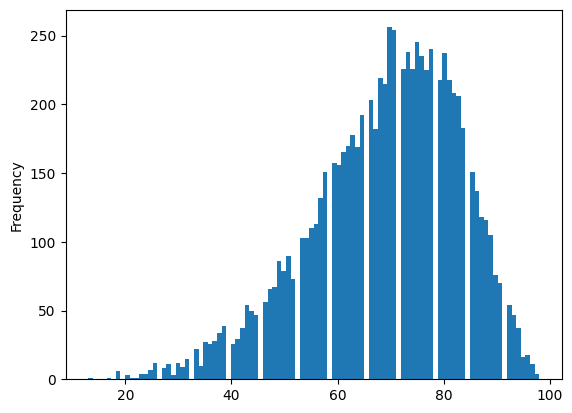

In [18]:
#observo como se ven los datos de critic score
print(df_games['critic_score'].sort_values().unique())
df_games['critic_score'].plot(kind='hist',bins=98)
plt.show()

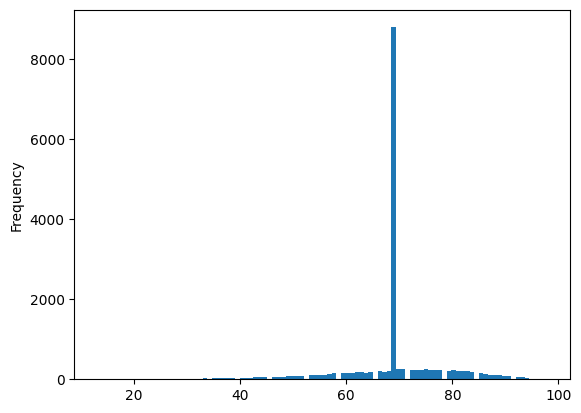

In [19]:
#como queda si utilizo la media para rellenar esos datos faltantes
df_games_critic_mean = df_games['critic_score'].fillna(df_games['critic_score'].mean())
df_games_critic_mean.plot(kind='hist', bins=98)
plt.show()

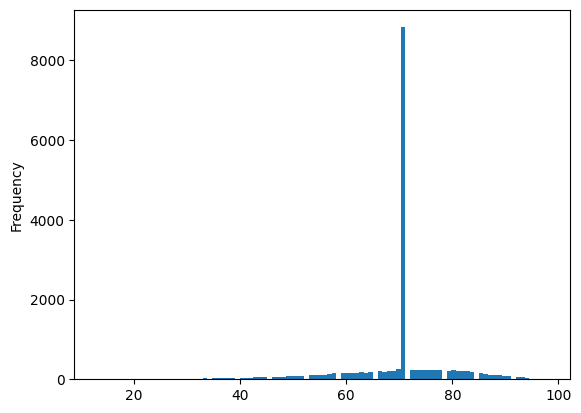

In [20]:
#como quedarian los datos si utilizo la mediana
df_games_critic = df_games['critic_score'].fillna(df_games['critic_score'].median())
df_games_critic.plot(kind='hist', bins=98)
plt.show()

Existen dos posibilidades con las cuales trabajaría esta cantidad de datos nulos:

Crear nuevos DFs que contengan los nulos que van a eliminarse del DF original, para poder trabajar con los datos que efectivamente sí tenemos, y poder recurrir a los datos que sí nos devuelven los dfs con datos nulos de ser necesario o para corroborar nuestra informacion:

- pasar los datos eliminados a un nuevo df

- df_games_critic_drop = df_games.drop(df_games[df_games['critic_score'].notna()].index)

- df_games.reset_index(drop=True, inplace=True)

- print(len(df_games_critic_drop) / len(df_games + df_games_critic_drop))

- df_games.drop(df_games[df_games['critic_score'].isna()].index, inplace=True)

U optar por lo que se decide a continuación, utilizar datos atípicos que son fáciles de identificar.

In [21]:
#Reemplazo nulos con número fuera de la norma
df_games['critic_score'] = df_games['critic_score'].fillna(999)

#convierto datos a int
df_games['critic_score'] = df_games['critic_score'].astype('int64')
#print(df_games.info())

Si se utiliza la media o la mediana para rellenar los datos faltantes, los datos se verían totalmente diferentes. El total de datos nulos equivale a el 51% del data frame. Dichos datos son importantes para hacer conclusiones en cuanto al futuro. Pero dándoles un valor de media o mediana cambia totalmente la distribucion de los datos. Se van a registrar como datos sesgados o atípicos. Luego se opta por transformar a int, siendo que los datos que sí pueden visualizarse son numeros enteros.

In [22]:
#observo como se ven los datos de user score
print(df_games['user_score'].sort_values().unique())

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


In [23]:
#checkeo cuantos datos tiene 'tbd' y si tienen algo más en comun
print(df_games[df_games['user_score']=='tbd'])

                                           name platform  year_of_release  \
119                               Zumba Fitness      Wii             2010   
301              Namco Museum: 50th Anniversary      PS2             2005   
520                             Zumba Fitness 2      Wii             2011   
645                                uDraw Studio      Wii             2010   
657    Frogger's Adventures: Temple of the Frog      GBA                0   
...                                         ...      ...              ...   
16693                           Planet Monsters      GBA             2001   
16695                          Bust-A-Move 3000       GC             2003   
16696                          Mega Brain Boost       DS             2008   
16702                                  Plushees       DS             2008   
16704             Men in Black II: Alien Escape       GC             2003   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score 

por lo que llega a observarse: estos datos tienen en común que en jp_sales los datos registrados son 00.0

In [24]:
#para corroborar si es real la observación pruebo con una muestra
#print(df_games[df_games['user_score']=='tbd'].sample(10))

Se descarta esta relación de tbd con la columna jp_sales ya que se encontraron valores mayores a 0.00 

In [25]:
#checkeo cuantos datos son nulos y si tienen algo más en comun

print(df_games[df_games['user_score'].isnull()])

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16708  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16709               LMA Manager 2007     X360             2006        Sports   
16710        Haitaka no Psychedelica      PSV             2016     Adventure   
16711               Spirits & Spells      GBA             2003      Platform   
16712            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [26]:
#reemplazo nulos con 99.9 y reemplazo 'tbd' con 88.8
df_games['user_score'] = df_games['user_score'].replace('tbd', 88.8)
df_games['user_score'] = df_games['user_score'].fillna(99.9)
#convierto de object a float
df_games['user_score'] = df_games['user_score'].astype('float')
#multiplico por 10 todos los datos de la fila
df_games['user_score'] = df_games['user_score']*10

In [27]:
#convierto de float a int
df_games['user_score'] = df_games['user_score'].astype('int64')
#df_games.info()

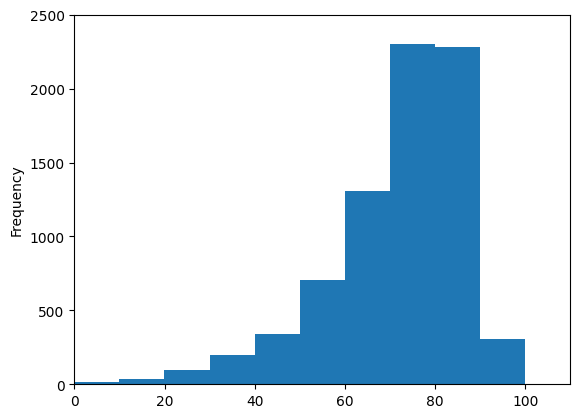

In [28]:
#observo los user score que tienen datos reales en un grafico, limitando solo los números "reales"
df_games['user_score'].plot(kind='hist', bins=100, xlim=[0,110], ylim=[0,2500])
plt.show()

reemplazar los datos object o nulos por la media o la mediana, cambiaria la visualización de los datos por la enorme cantidad que significan. Se decide reemplazar 'tbd' por 88.8 (un float) y los nan por 99.9, que son numeros totalmente atipicos y así poder identificarlos. Se convierten los datos del resto de la columna a float. Se multiplica por 10, de esta forma puedo pasar luego los numeros a enteros, y el score estaría ahora entre 0 y 100, y no entre 0 y 10.0. Se convierten los datos ahora a enteros donde me será más fácil trabajar.

Grafico para poder visualizar los datos reales, y agrego limites donde solo se observen los mismos, es decir, no los nulos o los 'tbd'.

In [29]:
#como se ven los datos en rating
df_games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [30]:
#Se rellenan los datos nulos en rating con 'Unknown'
df_games['rating'] = df_games['rating'].fillna('Unknown')

Se decide utilizar 'Unknown' porque las calificaciones son object.

In [31]:
#Creo columna de ventas totales
df_games['total_sales'] = df_games['eu_sales'] + df_games['jp_sales'] + df_games['na_sales'] + df_games['other_sales']

In [32]:
#Confirmo que todo el DF está apto para trabajarse
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  int64  
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.5+ MB


## Analisis de datos


                 name
year_of_release      
0                 269
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


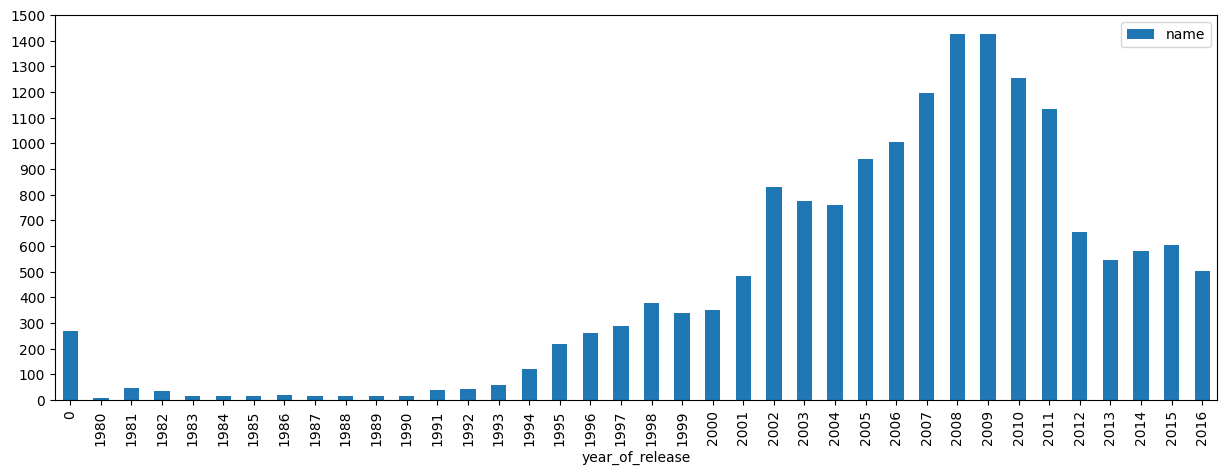

In [33]:
#cuento cúantos juegos fueron lanzados cada año
year_pivot = df_games.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_pivot.plot(kind='bar', figsize=(15,5), yticks=range(0, 1600, 100))
print(year_pivot)
plt.show()

Entre 1993-1994 hay un lanzamiento del doble de juegos. Lo mismo de 1994 a 1995.

Ocurre lo mismo de 2001 a 2002.

Luego el crecimiento es gradual donde los picos de lanzamiento más alto están entre 2008 y 2009, luego comienzan a descender.

Hay un gran declive entre 2011 a 2012, la mitad de lanzamientos con respecto al año anterior.

Debe tenerse en cuenta tamnién que hay 269 juegos que no están registrados.


Debajo se grafica para ver cómo se ven las ventas de todas las plataformas desde 1980 a 2016 y contrarestar con el gráfico de arriba.

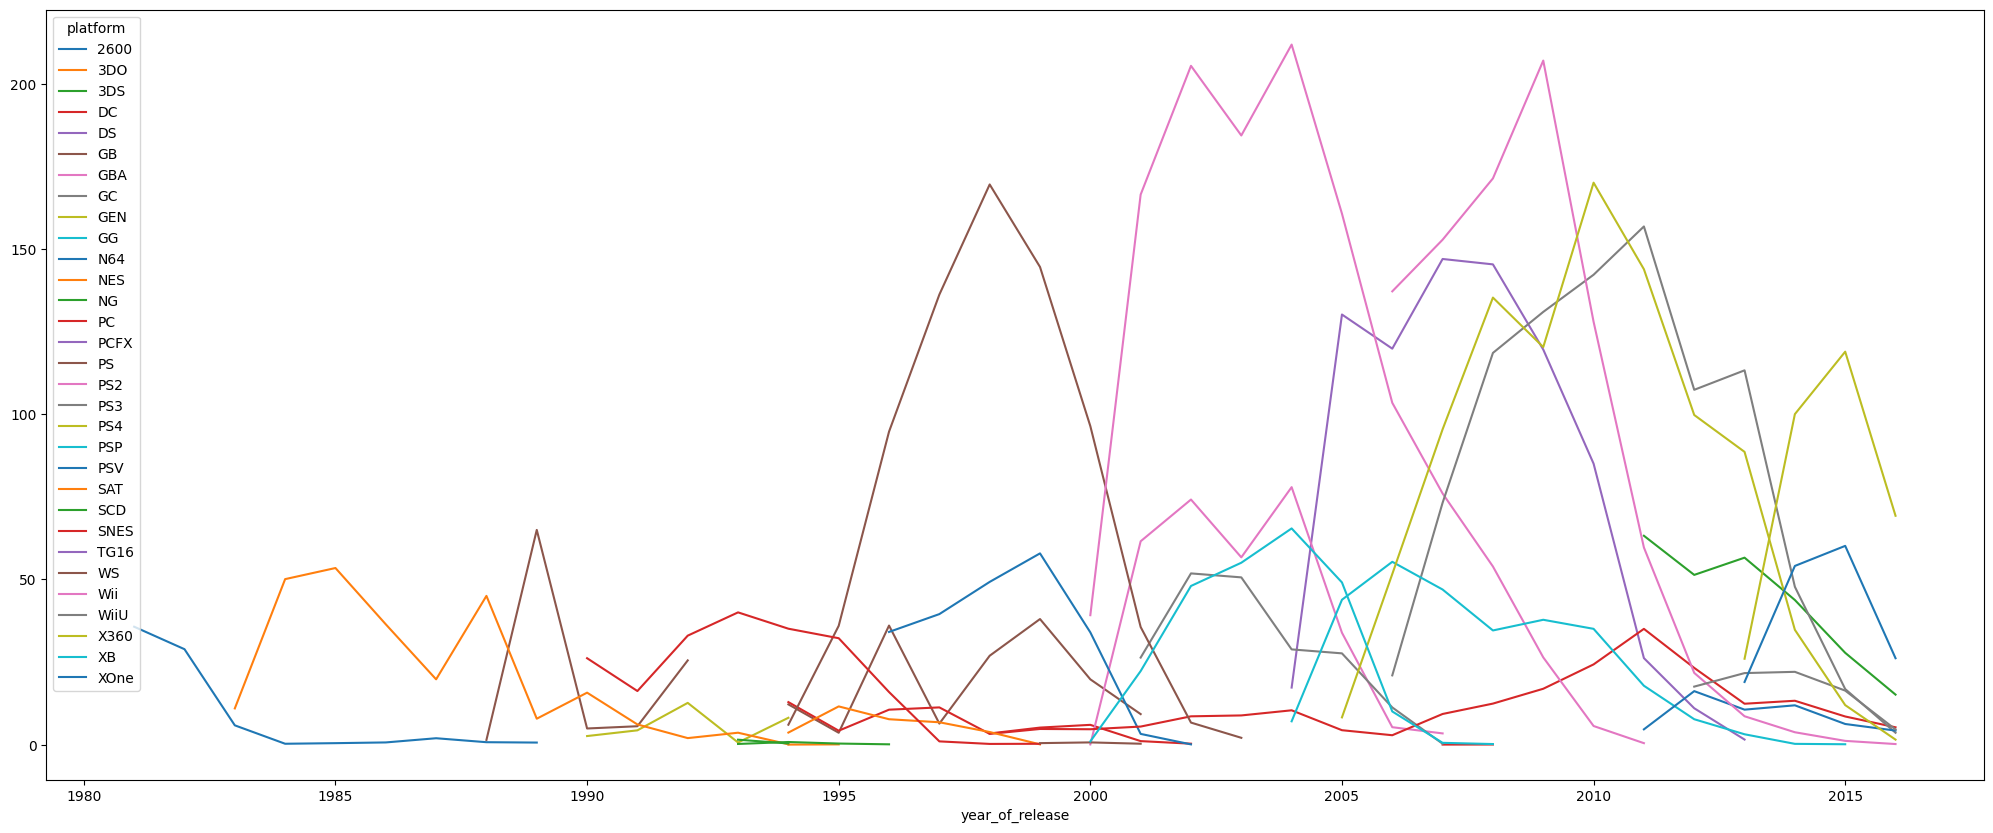

In [34]:
#Distribución de ventas por plataforma por año desde 1980

ventas_totales = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
ventas_totales = ventas_totales[ventas_totales['year_of_release'] > 1980]
totales_pivot = ventas_totales.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
totales_pivot.plot(figsize=(25,10))
plt.show()
#print(totales_pivot.fillna(0))

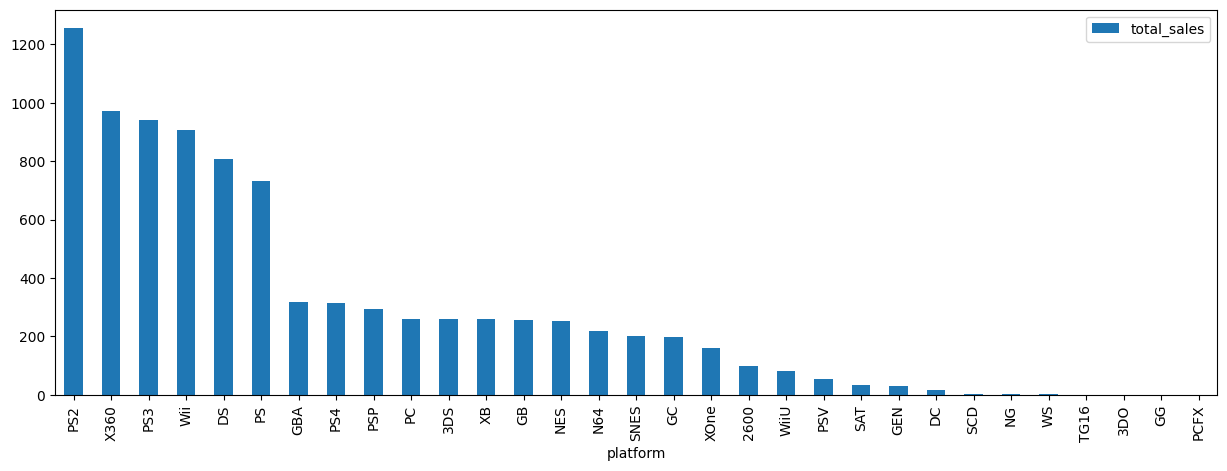

In [35]:
#Para mejor visibilidad y comprensión se grafica en barras cantidad de ventas totales por plataforma.
#Total de ventas por plataforma
ventas_pivot = df_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
ventas_pivot.plot(kind='bar', figsize=(15,5))
plt.show()
#print(ventas_pivot)

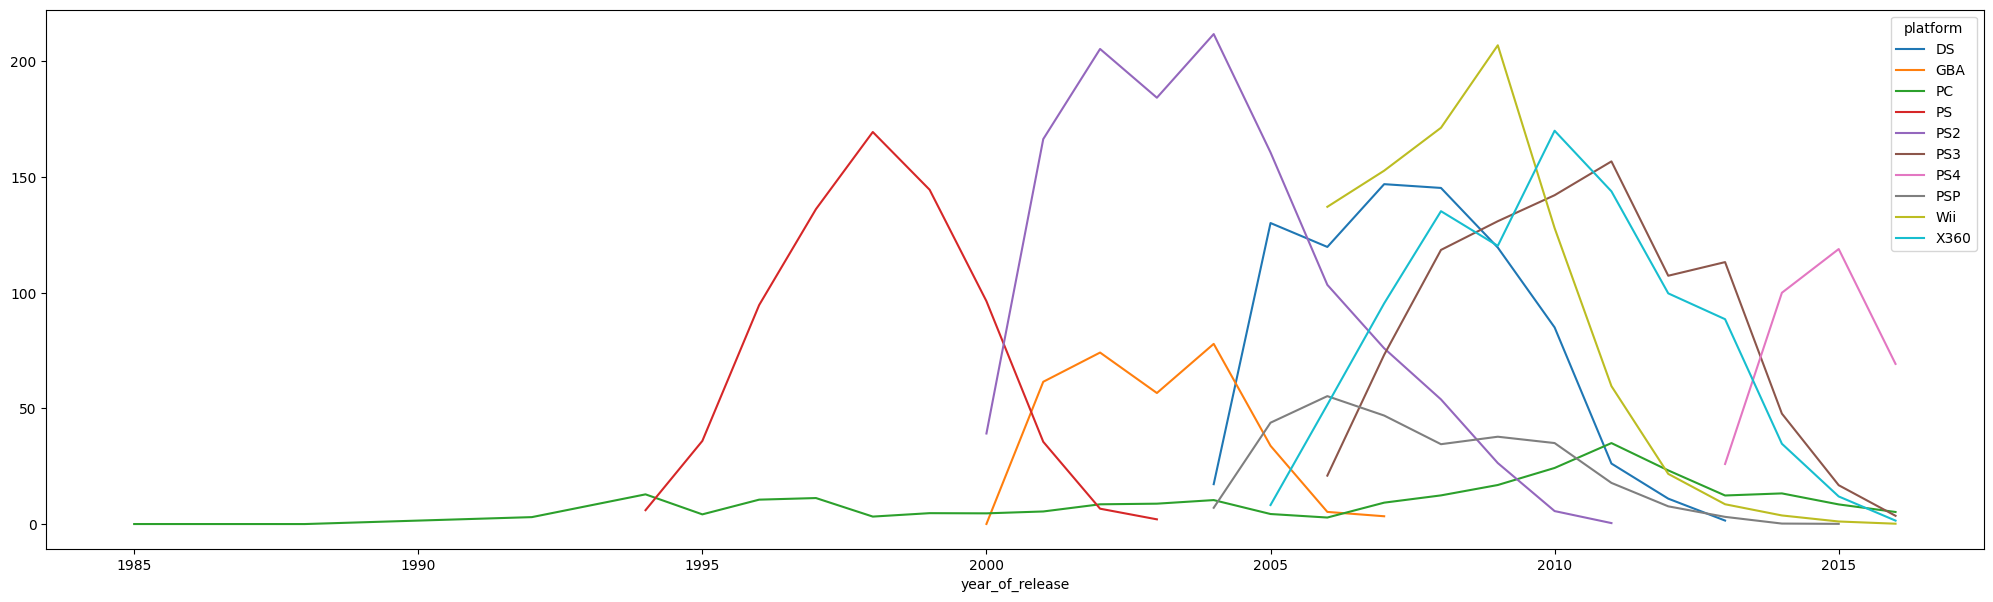

In [36]:
#Se van a tomar los primeros 10 plataformas que tienen mayor cantidad de ganancias por ventas para ver su distribucion con los años.

top_10 = ventas_pivot.head(10).reset_index()
top_10 = df_games[df_games['platform'].isin(top_10['platform'])].reset_index(drop=True)
top_10 = top_10.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
top_10 = top_10[top_10['year_of_release'] > 1980]
top_10_pivot = top_10.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_10_pivot.plot(kind='line', figsize=(25,7))
plt.show()

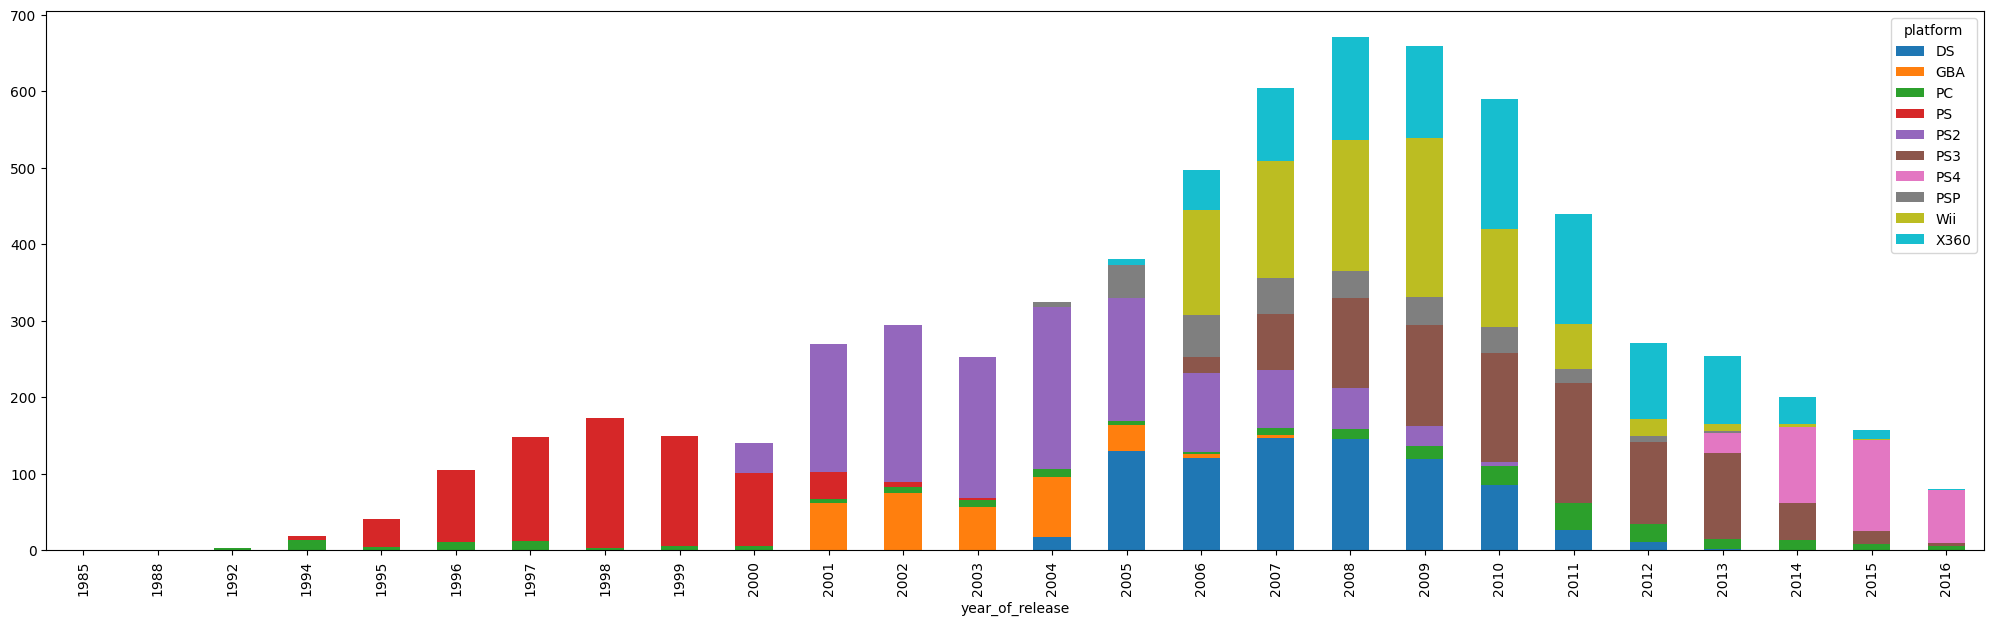

In [37]:
#para mejor visualizacion de la distribución de ganancias por plataforma por año 
top_10_pivot.plot.bar(stacked=True,figsize=(25,7))
plt.show()

Las plataformas que solian ser populares pero ya no, tienen una 'duración de vida' de entre 6 y 10 años. La única que se mantiene desde 1985, sin grandes cantidades de ventas anuales es PC.

Teniendo en cuenta que las plataformas populares tienen un maximo de vida de 10 años, se van a tomar los datos a partir del 2007, 10 años atrás.

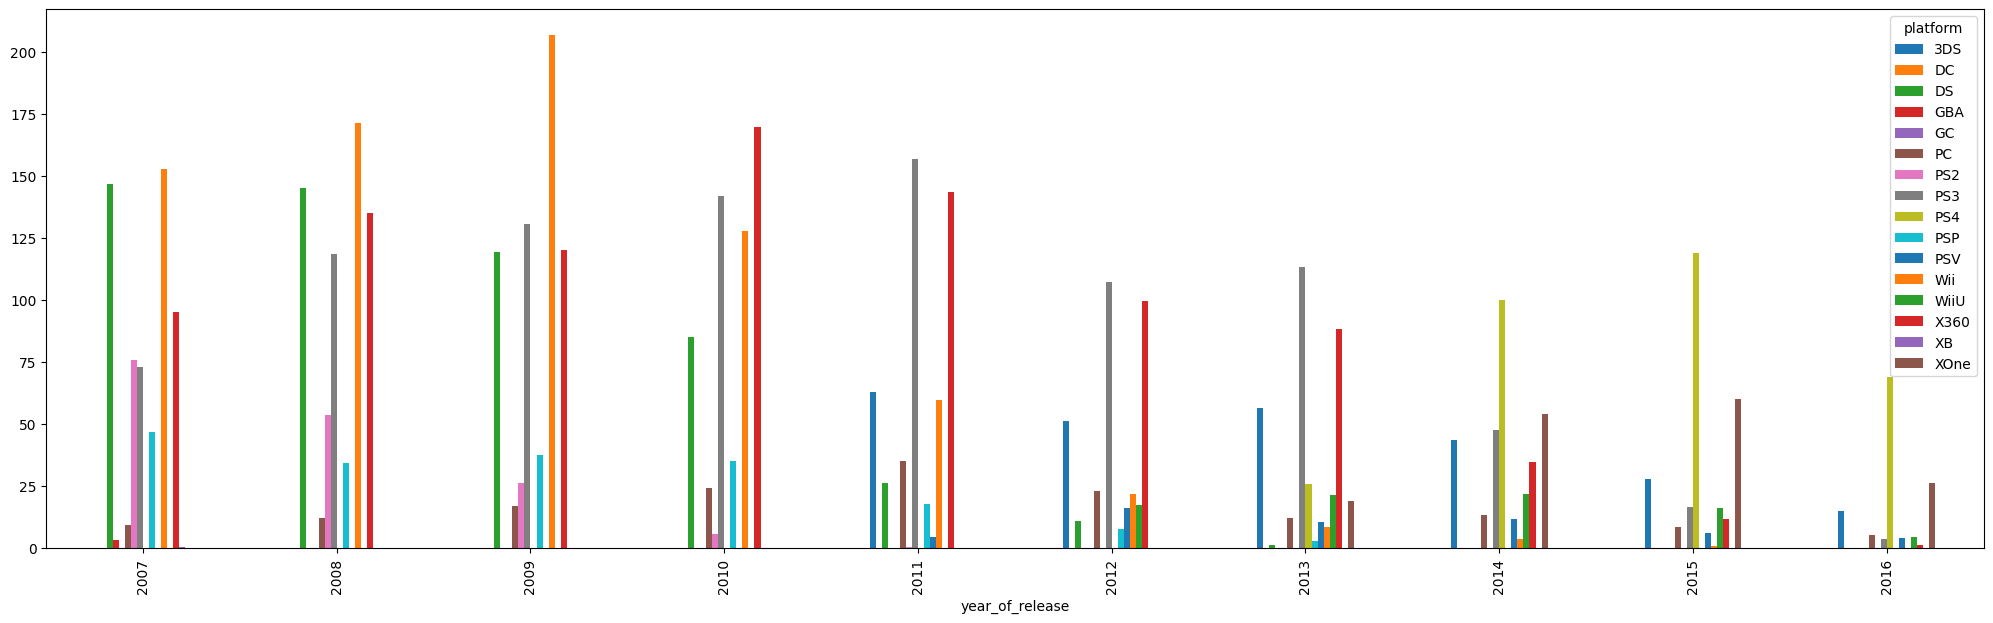

In [38]:
#Cómo se ven las paltaformas y sus ventas en los ultimos 10 años.
ventas_totales_2007 = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
ventas_totales_2007 = ventas_totales_2007[ventas_totales_2007['year_of_release'] >= 2007]
totales_pivot_2007 = ventas_totales_2007.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
totales_pivot_2007.plot.bar(figsize=(25,7))
plt.show()

A partir de lo observado se van a tomar las siguientes plataformas como las más rentables:

PS4 y XOne: si bien las ventas están cayendo, sigue siendo de las que mayor ventas tienen en 2016.

PC: Si bien sus ventas no son tan grandes como las anteriores mencionadas, se mantienen desde hace años en el mercado generando ganancias todos los años.

platform         3DS         DC           DS         GBA          GC  \
count     520.000000  52.000000  2151.000000  822.000000  556.000000   
mean        0.498077   0.306731     0.374765    0.386679    0.357788   
std         1.430876   0.468660     1.426451    0.896897    0.686346   
min         0.010000   0.020000     0.010000    0.010000    0.010000   
25%         0.050000   0.077500     0.050000    0.052500    0.060000   
50%         0.120000   0.135000     0.110000    0.160000    0.150000   
75%         0.330000   0.297500     0.270000    0.390000    0.352500   
max        14.600000   2.410000    29.800000   15.840000    7.060000   

platform          PC          PS2          PS3         PS4          PSP  \
count     973.000000  2161.000000  1329.000000  392.000000  1209.000000   
mean        0.266721     0.581106     0.707035    0.801378     0.243218   
std         0.675906     1.137927     1.392845    1.609456     0.520210   
min         0.010000     0.000000     0.000000    0

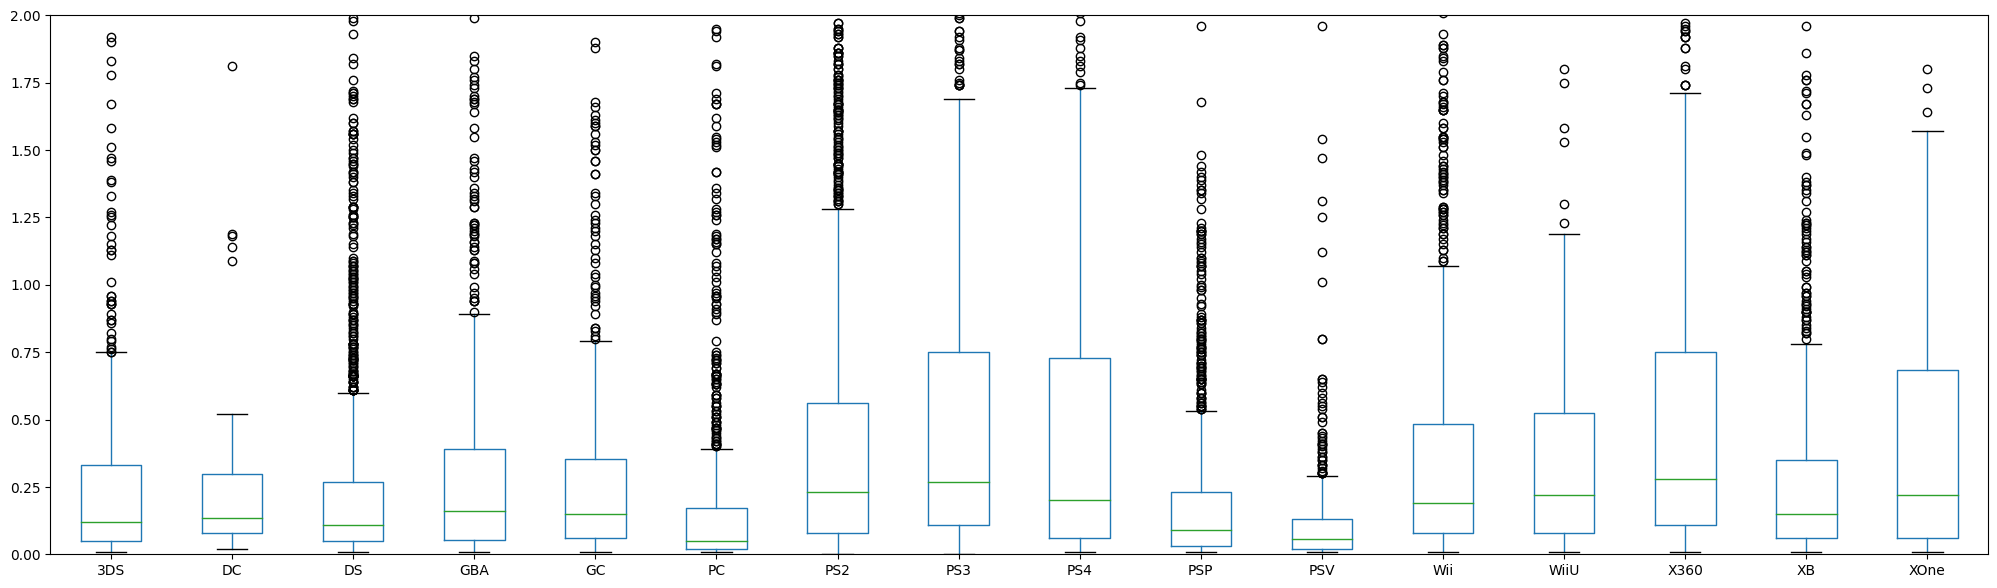

In [39]:
#Se filta el DF para crear uno nuevo donde se observen las ventas globales desde el 2007 por plataforma.
platform_sales = df_games[df_games['platform'].isin(ventas_totales_2007['platform'])].pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
print(platform_sales.describe())
#print(platform_sales[platform_sales['PS4'] > 0]['PS4'])

platform_sales.plot(kind='box', ylim=[0, 2], figsize=(25,7))
plt.show()

Se puede observar que la media, en ninguna de las plataformas, coincide o esta cerca de la mediana por la cantidad de valores atípicos.
El 50% de los datos, en gran resumen, se encuentran entre el 0.01% como mínimo (Q1) y el 0.75% como máximo (Q3), dejando muchisimos valores atípicos o sesgados fuera.   

                                        name platform  year_of_release  \
42                        Grand Theft Auto V      PS4             2014   
77                                   FIFA 16      PS4             2015   
92            Call of Duty: Advanced Warfare      PS4             2014   
94                                   FIFA 17      PS4             2016   
105                                Fallout 4      PS4             2015   
...                                      ...      ...              ...   
16484                     Super Dungeon Bros      PS4             2016   
16497  Sherlock Holmes: The Devil's Daughter      PS4             2016   
16498                            Root Letter      PS4             2016   
16524                             Dungeons 2      PS4             2016   
16528                Carmageddon: Max Damage      PS4             2016   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
42           Action      3.96  

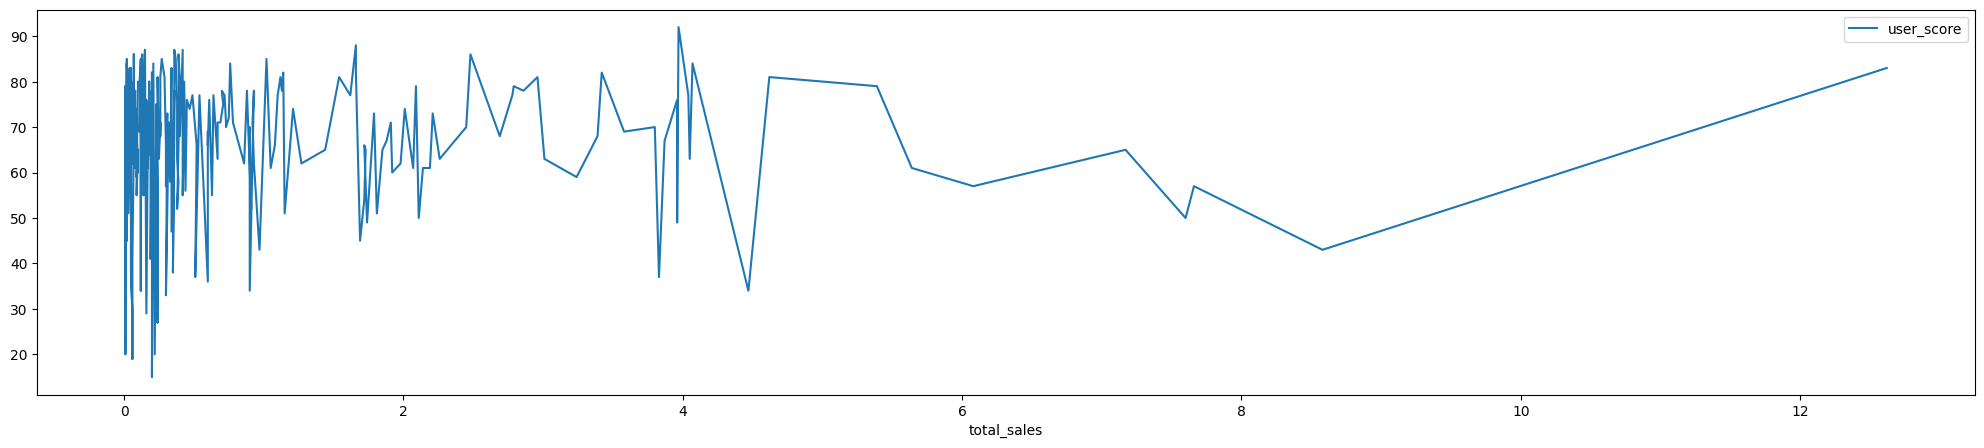

In [40]:
#Se toma la plataforma PS4 para observar si la reseña de los usuarios afecta las ventas de una plataforma popular
ps4_venta_contra_user_reviews = df_games[df_games['user_score'] <= 100]
ps4_venta_contra_user_reviews = ps4_venta_contra_user_reviews[ps4_venta_contra_user_reviews['platform'] == 'PS4']
print(ps4_venta_contra_user_reviews)
ps4_venta_contra_user_reviews.plot(kind='line', x='total_sales', y='user_score', figsize=(25,5))
plt.show()

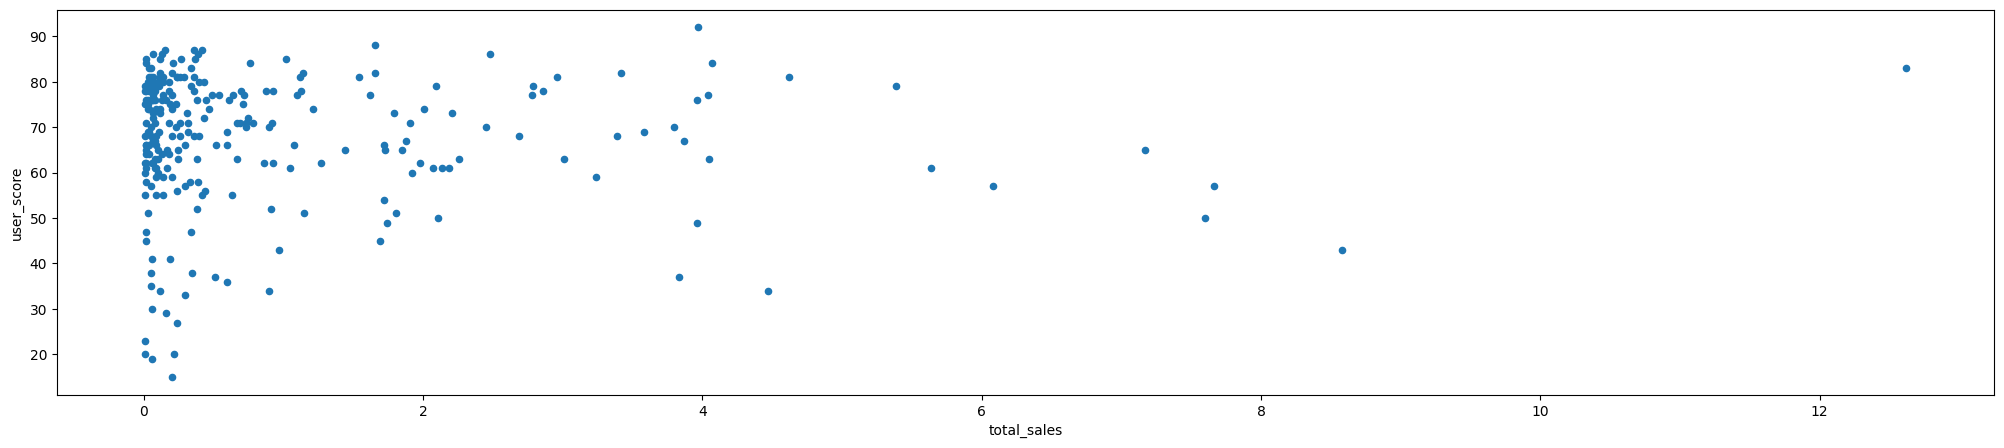

In [41]:
ps4_venta_contra_user_reviews.plot(kind='scatter', x='total_sales', y='user_score', figsize=(25,5))
plt.show()

In [42]:
#Calculo la correlación:
corr_user_venta = ps4_venta_contra_user_reviews['user_score'].corr(ps4_venta_contra_user_reviews['total_sales'])
print(corr_user_venta)

-0.031957110204556397


La correlacion de critica del usuario con las ventas es muy débil, es decir, casi no hay correlación entre ellas, lo corrobora su coeficiente de relacion: -0.3

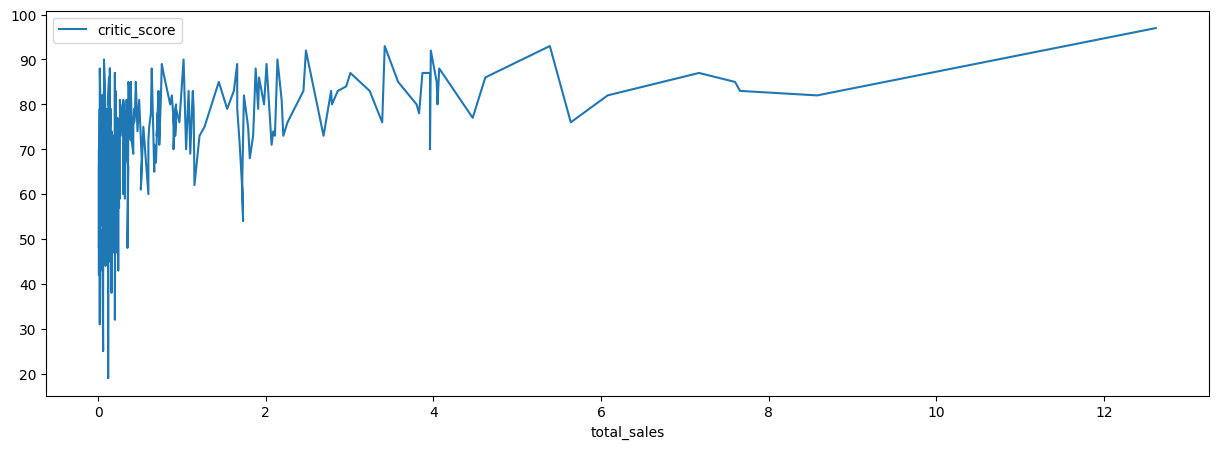

In [43]:
#Observo si hay correlación entre las reseñas de críticos y las ventas
ps4_venta_contra_critic_reviews = df_games[df_games['critic_score'] <= 100]
ps4_venta_contra_critic_reviews = ps4_venta_contra_critic_reviews[ps4_venta_contra_critic_reviews['platform'] == 'PS4']
ps4_venta_contra_critic_reviews.plot(kind='line', x='total_sales', y='critic_score', figsize=(15,5))
plt.show()

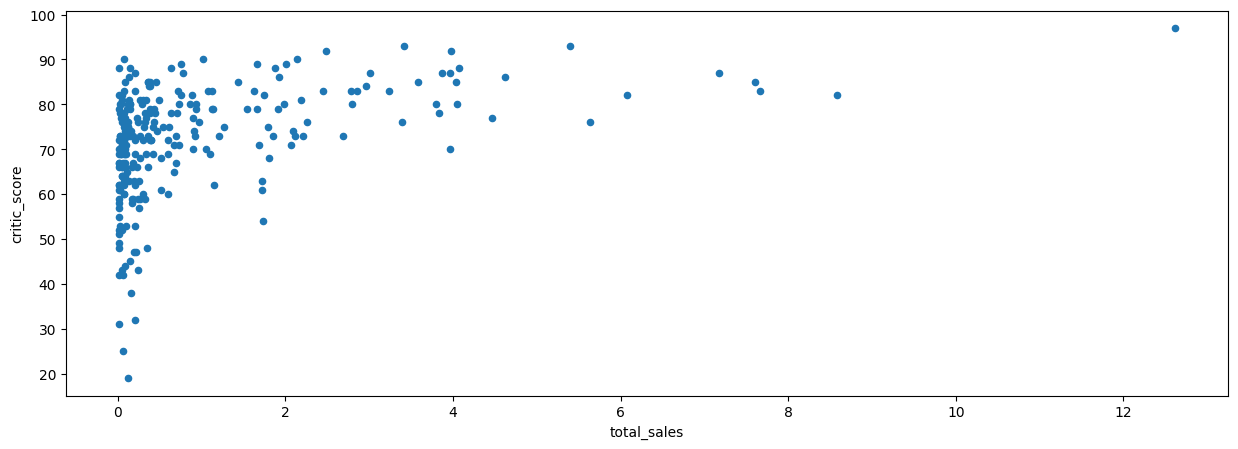

In [44]:
ps4_venta_contra_critic_reviews.plot(kind='scatter', x='total_sales', y='critic_score', figsize=(15,5))
plt.show()

In [45]:
#Calculo correlacion
corr_critic_venta = ps4_venta_contra_critic_reviews['critic_score'].corr(ps4_venta_contra_critic_reviews['total_sales'])
print(corr_critic_venta)

0.40656790206178095


La relación de profesionales con las ventas, tiene un impacto positivo, aunque pequeño, lo cual se termina de corroborar al ver que el coeficiente de correlacion es de 0.4.

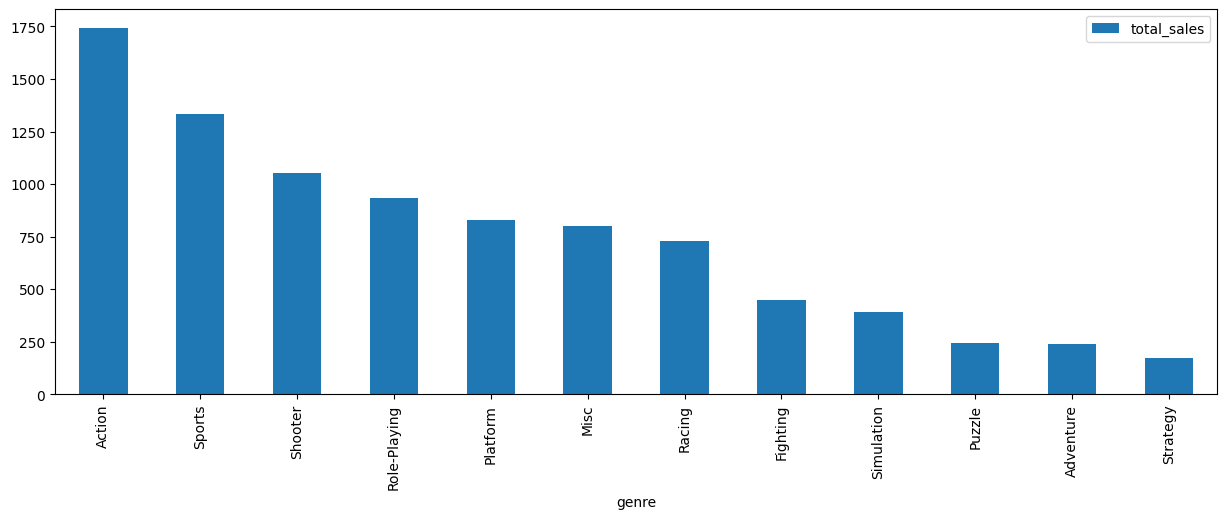

In [46]:
#Observo los géneros más rentables:
venta_por_genero = df_games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
venta_por_genero.plot(kind='bar', figsize=(15,5))
plt.show()

Claramente los más vendidos son los de acción que pueden jugarse en grupos. Mientras que los de estrategia y aventura son menos solicitados.

## Perfil por usuario

### variaciones de las ventas por plataforma por region


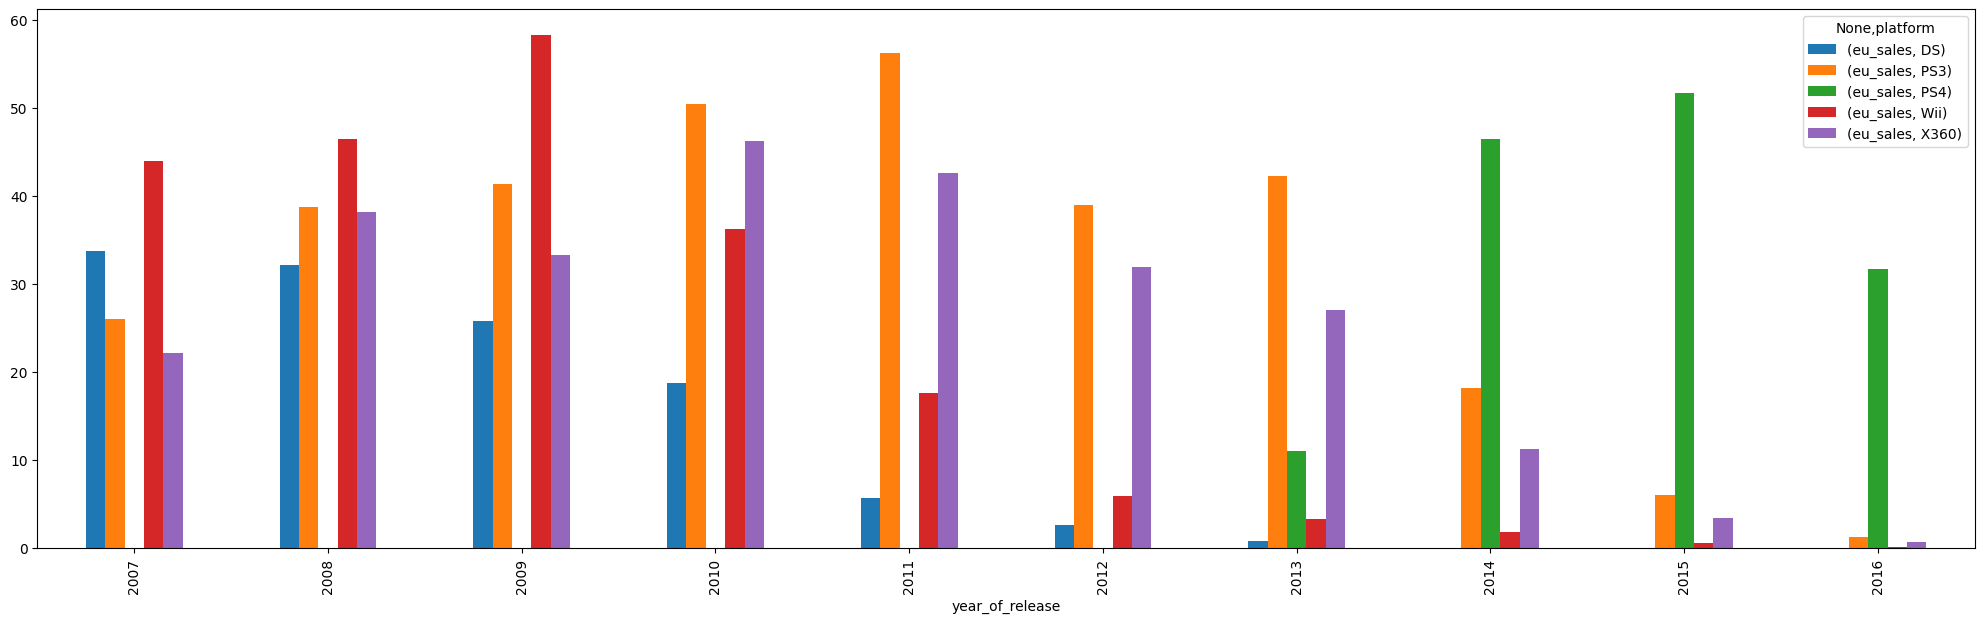

In [47]:

#Europa
eu_2007 = df_games.groupby(['platform', 'year_of_release'])[['eu_sales']].sum().reset_index()
eu_2007 = eu_2007[eu_2007['year_of_release'] >= 2007]

#checkeo las plataformas más populares
pop_plat_eu = eu_2007.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

#filtro el DF por las 5 plataformas más populares de la region en los ultimos 10 años
eu_2007 = eu_2007[eu_2007['platform'].isin(pop_plat_eu.index)] 
#print(eu_2007.set_index('platform'))
eu_pivot_2007 = eu_2007.pivot_table(index='year_of_release', columns='platform', values=['eu_sales'])
eu_pivot_2007.plot.bar(figsize=(25,7))
plt.show()

Se observa:

* DS: supo ser popular, pero con los años cayeron sus ventas.

* PS3 tuvo mucha popularidad, y fue de los que mayor ventas gener¡o con su pico màs alto en 2011. Pero a partir del 2013 empezaron a caer las ventas.

* PS4: Empezo a ganar popularidad a partir del 2013, obteniendo su pico más alto en 2015. En este 2016 fue la plataforma más popular en este top 5.

* Wii: fue la paltaforma que generó un pico muy alto de ventas en 2009, pero despues cayeron sus ventas, obteniendo un registro mínimo en 2015.

* X360: se registran ventas medias, de 2010-2013 fue la segunda plataforma que vendió más juegos. EN 2016 las ventas son muy bajas.

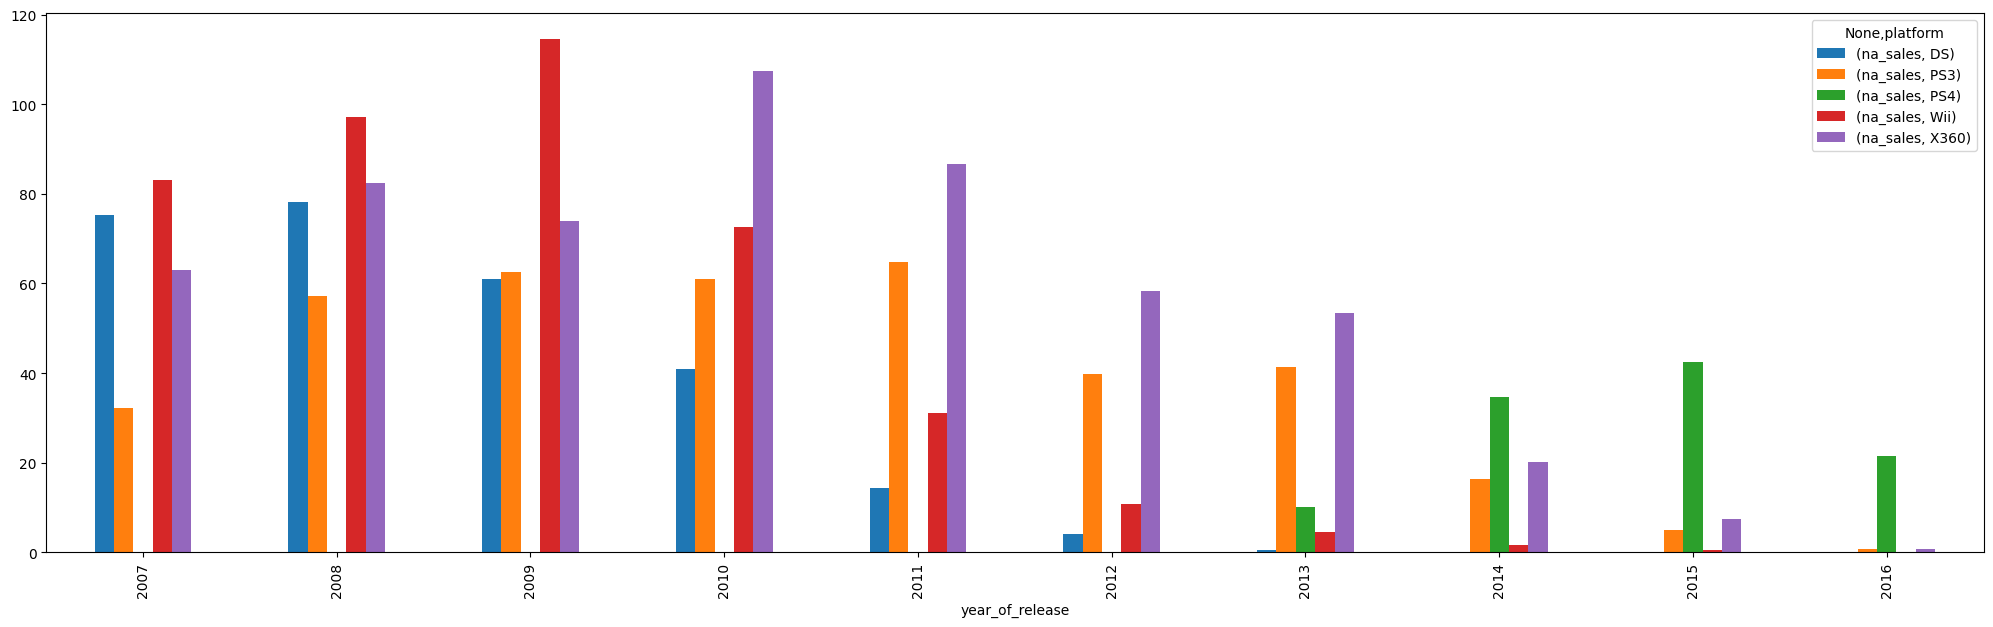

In [48]:
#America del norte
na_2007 = df_games.groupby(['platform', 'year_of_release'])[['na_sales']].sum().reset_index()
na_2007 = na_2007[na_2007['year_of_release'] >= 2007]
pop_plat_na = na_2007.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
#print(pop_plat_na)
na_2007 = na_2007[na_2007['platform'].isin(pop_plat_na.index)]
#print(na_2007.set_index('platform'))
na_pivot_2007 = na_2007.pivot_table(index='year_of_release', columns='platform', values=['na_sales'])
na_pivot_2007.plot.bar(figsize=(25,7))
plt.show()

Se observa:


*   DS: ventas muy buenas en 2007-2008, luego gradualmente cayeron y en 2013 ya las ventas fueron muy minimas.
*   PS3: si bien no es de las plataformas con picos m¡as altos tiene registros los 10 años que se est¡an analizando. En 2015 las ventas ya fueron muy bajas, y en 2016 minimas.
*   PS4: empezó a ganar popularidad en 2013, y desde 2014 es la plataforma que mayor ganancias genera entre estas 5 plataformas que se evaluan.
*   Wii: Sus años de mayor popularidad fueron 2007-2009, luego sus ventas fueron cayendo, hasta 2015 donde hay un registro mínimo de ellas.
*   X360: Es otra de las plataformas que registran ventas en los ultimos 10 años. Tuvo su mayor pico mas alto en ventas en 2010, y siguio siendo la mas vendida, no tanto como en 2010, del 2011-2013, y las ventas cayeron obtuviendo la minima de ventas en 2016.  


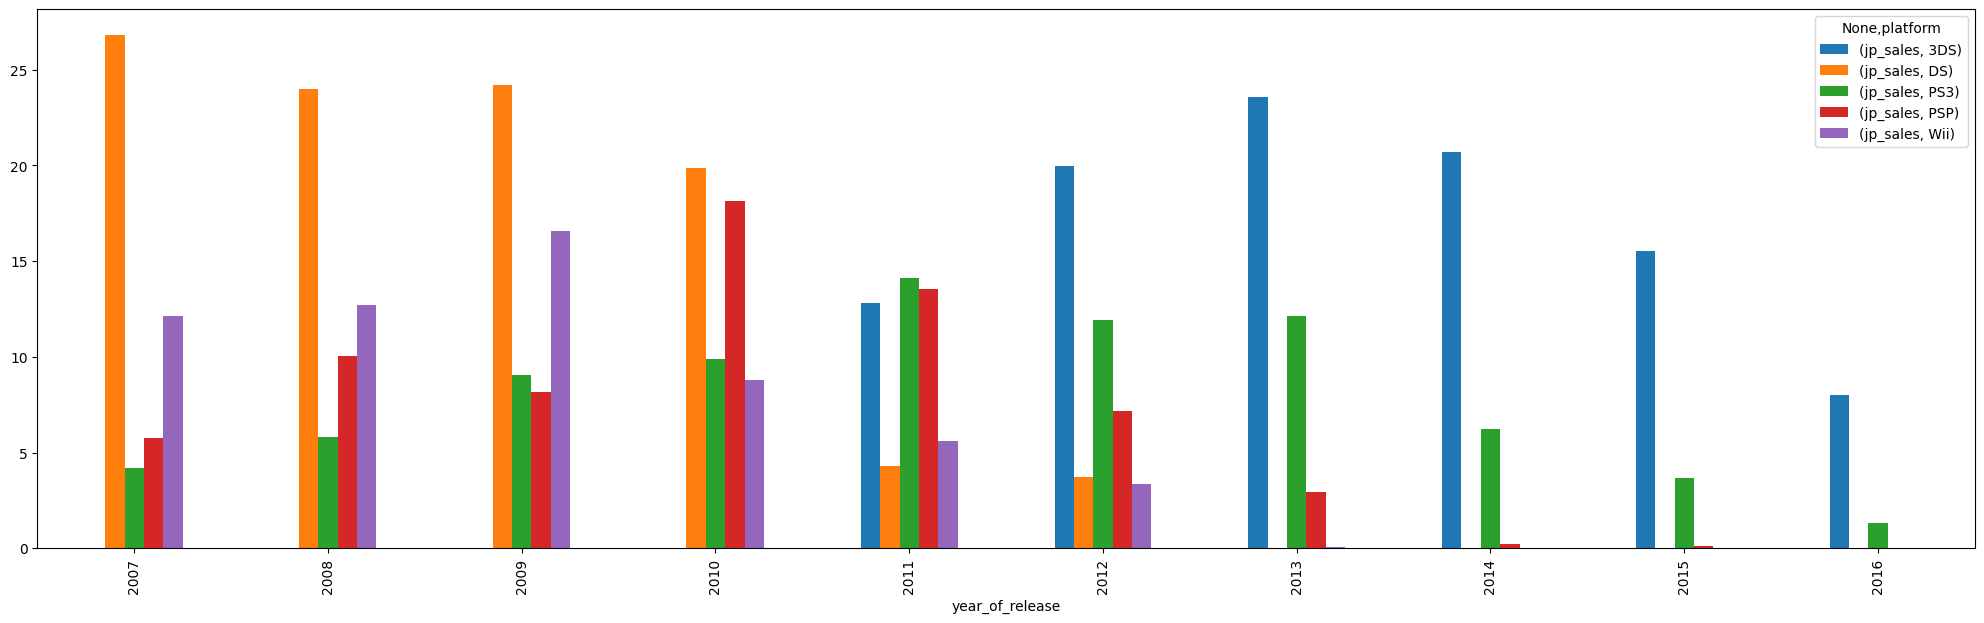

In [49]:
#Japon

#Se van a observar cómo se ven las plataformas en las diferentes regiones y sus ventas en los ultimos 10 años.
jp_2007 = df_games.groupby(['platform', 'year_of_release'])[['jp_sales']].sum().reset_index()
jp_2007 = jp_2007[jp_2007['year_of_release'] >= 2007]
pop_plat_jp = jp_2007.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
#print(pop_plat_jp)
jp_2007 = jp_2007[jp_2007['platform'].isin(pop_plat_jp.index)]
#print(jp_2007.set_index('platform'))
jp_pivot_2007 = jp_2007.pivot_table(index='year_of_release', columns='platform', values=['jp_sales'])
jp_pivot_2007.plot.bar(figsize=(25,7))
plt.show()

Se observa:


*   3DS: empezo a generar ganancias en 2011, llegando a su pico m¡as alto en 2013. Ala fecha sigue siendo la plataforma que genera mayor cantidad de ventas entre las 5 m¡as populares en los ultimos 10 años.
*   DS: supo ser la m¡as popular del 2007-2010. cayendo sus ventas en 2011 y en 2012 se registran las ultimas ganancias.
*   PS3: es la unica plataforma que registra ventas desde el 2007 a la fecha, siendo este ultimo año sus ventas mas bajas. Su pico mas alto fue en 2011, siendo la que mayor ventas genero ese año.
*   PSP: se registran ventas desde el 2007 hasta el 2015, siendo este ultimo y el año 2014 sus ventas mas bajas. Su pico mas alto fue en 2010.
*   Wii: tuvo sus picos mas altos en 2007-2009, luego cayeron las ventas y las ultimas se registraron las ventas minimas.

Se observa, en general, que las plataformas populares en NA se reflejan, con menores ventas, en EU. Pero en JP, las plataformas que no son tan populares en las otras regiones si lo son en esta.

### Los géneros principales en las tres regiones

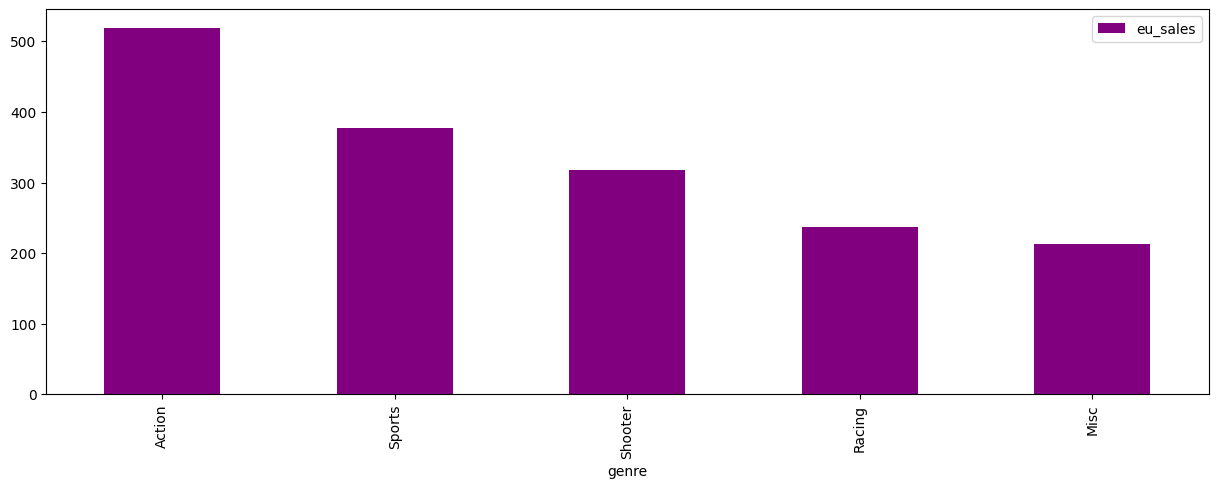

In [50]:
#Europa
genre_eu = df_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
genre_eu_pivot = genre_eu.plot(kind='bar', figsize=(15,5), color='purple')
plt.show()

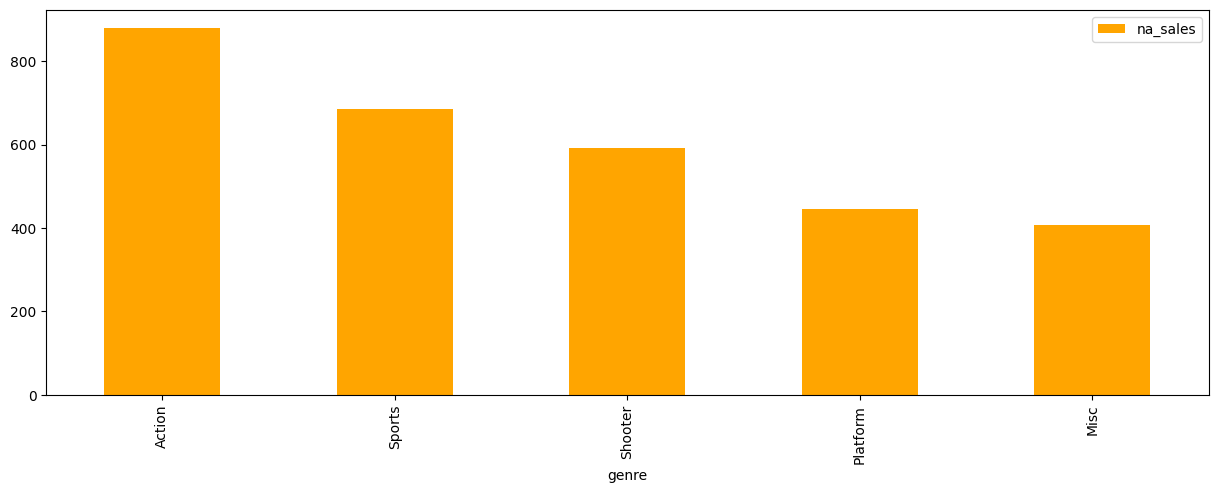

In [51]:
#America del norte
genre_na = df_games.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
genre_na_pivot = genre_na.plot(kind='bar', figsize=(15,5), color='orange')
plt.show()

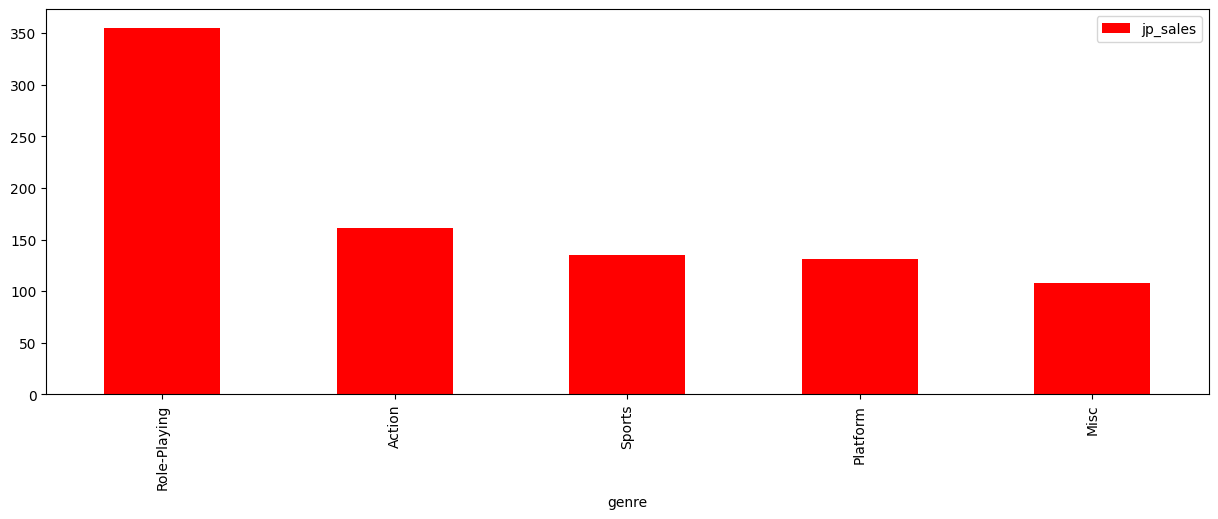

In [52]:
#Japon
genre_jp = df_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
genre_jp_pivot = genre_jp.plot(kind='bar', figsize=(15,5), color='red')
plt.show()

Los generos que coinciden en las tres regiones: accion, deporte, misc.

El ranking de generos entre EU y NA, excepto por el puesto 4, es el mismo.

Role-Play ocupa el puesto 1 en Japon, pero no está dentro del top 5 de las otras dos regiones.

### Rating - ventas por region

In [53]:
#cuales son los generos
print(df_games['rating'].unique())

['E' 'Unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


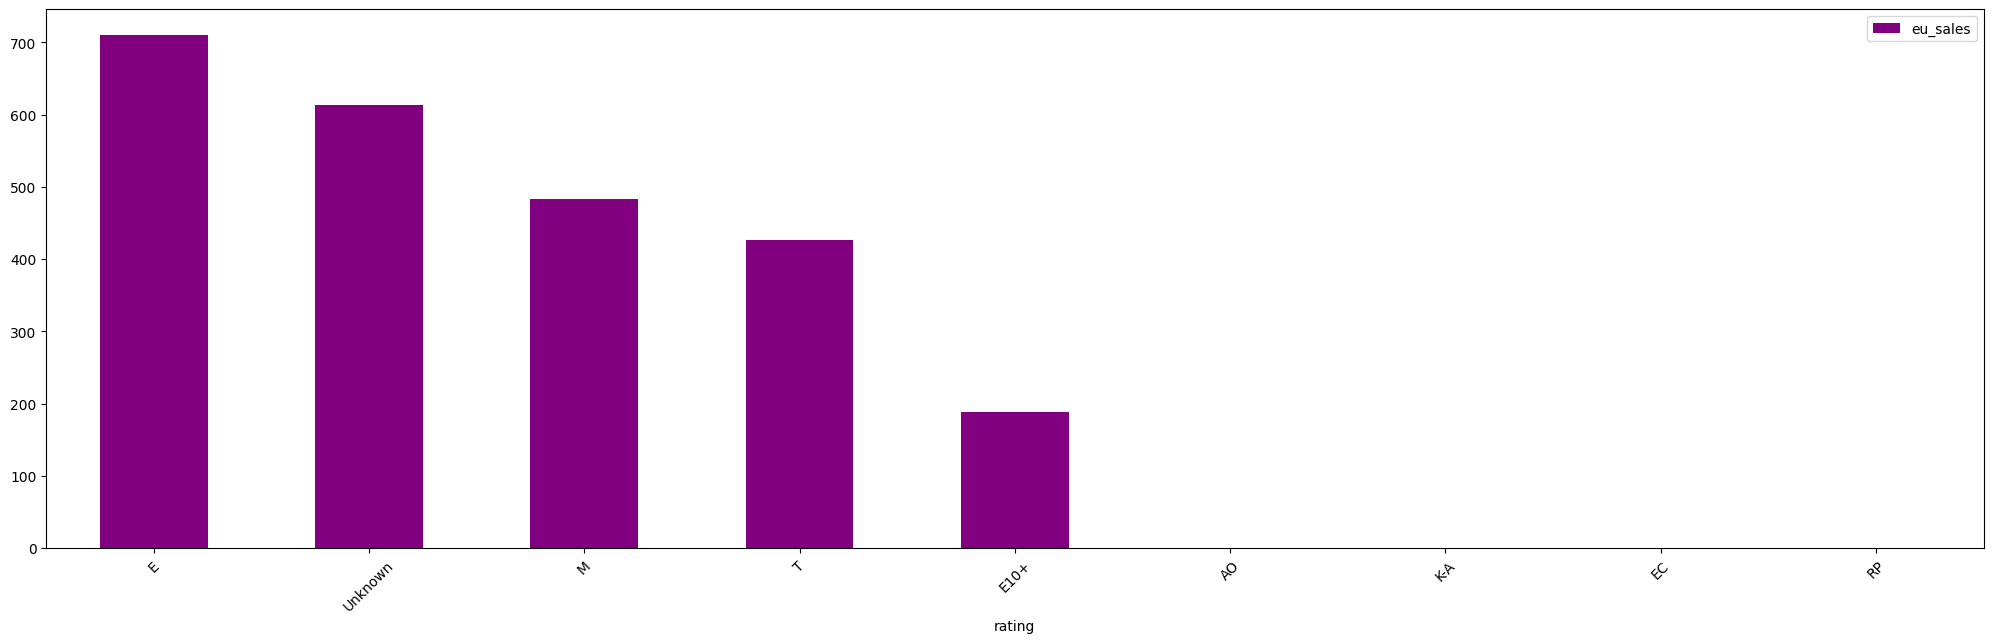

In [54]:
#Europa
rating_eu = df_games.pivot_table(index='rating',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

rating_eu_pivot = rating_eu.plot(kind='bar', figsize=(25,7), color='purple', rot=45)
plt.show()

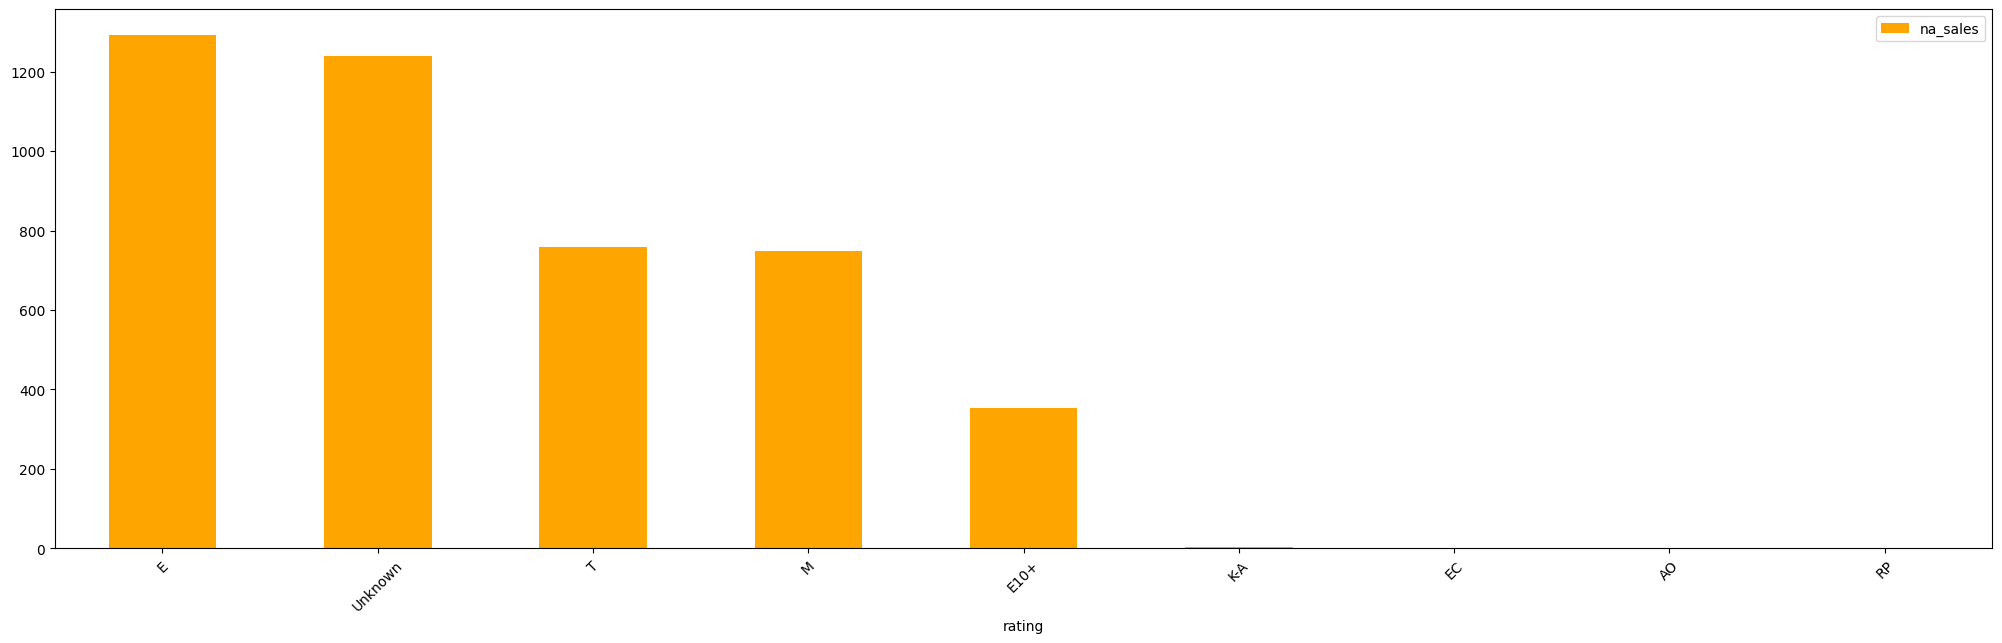

In [55]:
#America del norte
rating_na = df_games.pivot_table(index='rating',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
rating_na_pivot = rating_na.plot(kind='bar', figsize=(25,7), color='orange', rot=45)
plt.show()

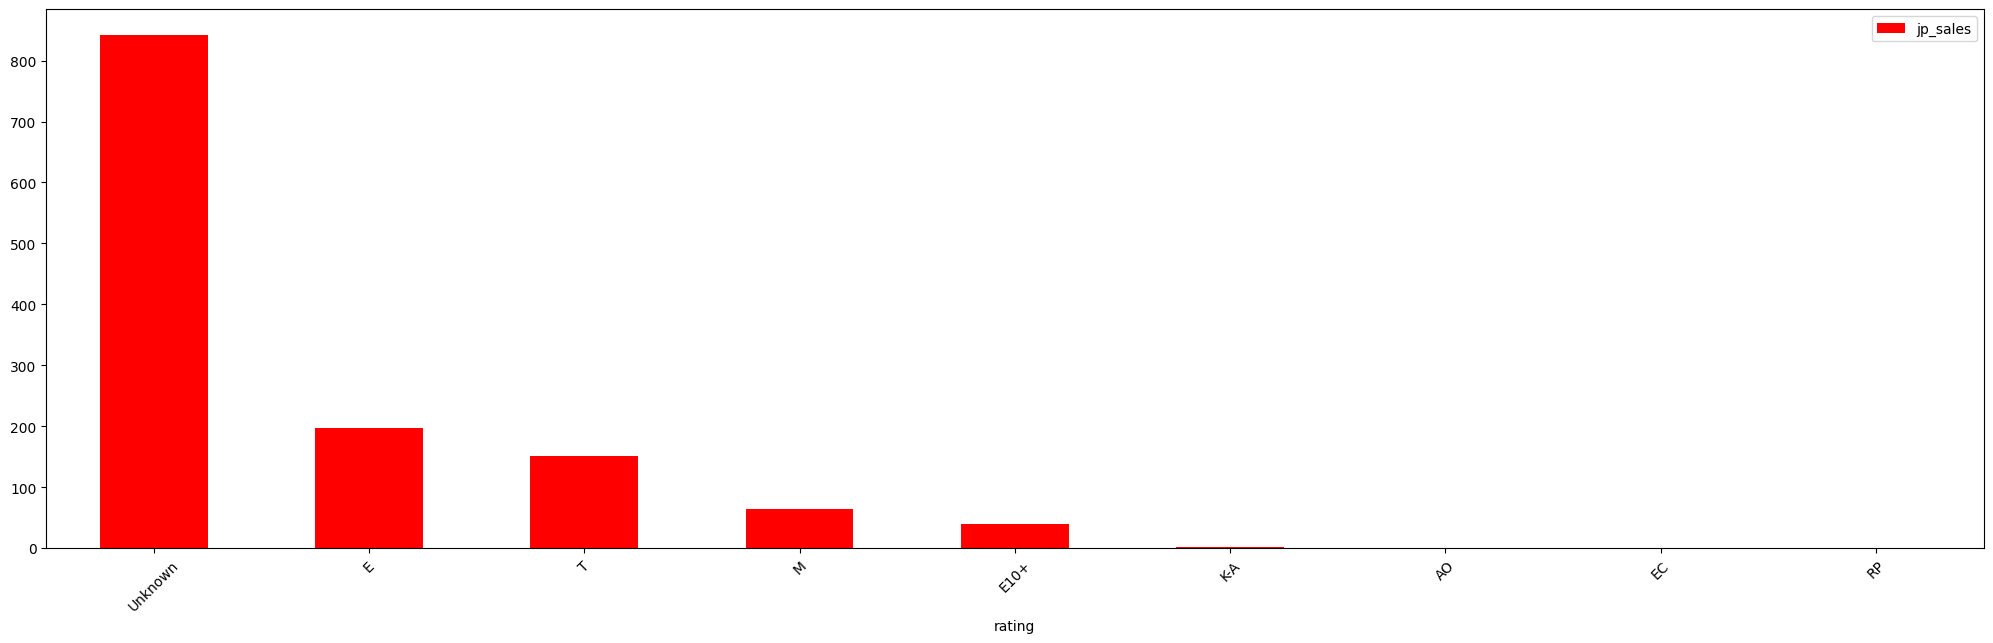

In [56]:
#Japon
rating_jp = df_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

rating_jp_pivot = rating_jp.plot(kind='bar', figsize=(25,7), color='red', rot=45)
plt.show()

Los juegos con rating 'E', 'M', 'T', 'E+10' tienen grandes ventas, como así tambien el rating desconocido 'unknown'.


Si bien se observa una correlacion de ventas con dichas 'categorias' del rating, no estoy del todo segura cómo influyen los mismos al momento de la compra.

## Prueba de Hipotesis

### HP: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [57]:
print(df_games['platform'].sort_values().unique())

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


In [58]:
#HP0: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
#HP1: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes

#Filtro el DF por los 'user_score' reales.
df_games_filtered = df_games[df_games['user_score']<= 88]
alfa = 0.05

xone_user_score = df_games_filtered[df_games_filtered['platform'] == 'XOne']['user_score'].mean()

pc_user_score = df_games_filtered[df_games_filtered['platform'] == 'PC']['user_score'].mean()

t_stat, p_val_2tail = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

if p_val_2tail < alfa:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

No rechazamos la hipótesis nula


/tmp/ipykernel_33/1072142485.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val_2tail = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)
/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [59]:
#HP0: las calificaciones promedio de los usuarios para los generos de accion y deportes son iguales.
#HP1: las calificaciones promedio de los usuarios para los generos de accion y deportes son diferentes.

#Filtro el DF por los 'user_score' reales.
df_games_filtered = df_games[df_games['user_score']<= 88]

alfa = 0.05
action_user_score = df_games_filtered[df_games_filtered['genre'] == 'action']['user_score'].mean()
sport_user_score = df_games_filtered[df_games_filtered['genre'] == 'sport']['user_score'].mean()

resultado = st.ttest_ind(action_user_score, sport_user_score, equal_var=False)


if resultado.pvalue < alfa:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

No rechazamos la hipótesis nula


/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


## Conclusión General

Luego del análisis realizado sobre los datos con los que hemos trabajado se ha determinado que:
* Hay mayor cantidad de plataformas a partir de los 2000.
* en los ultimos 10 años las ventas tenido su pico mas alto entre 2007-2011, pero luego se ve un significativo descenso en la venta de juegos.
* Los generos de juego mas populares son de accion, deporte, shooter (disparos/armas), y juego de roles.
* La esperanza de vida de una plataforma ronda un promedio de 6 a 10 años. 
* Las plataformas que al 2016 generan ventas en las tres regiones son PS4, PS3, X360, 3DS, Wii.
* Al checkear cantidad de ventas globales observamos que en orden descendiente las mas populares son:
PS4, XOne, 3DS, PC y  WiiU.

Ahora bien, como conclusion general: 
Generos en los cuales hacer foco: accion, deporte y de armas.
La plataforma PS4 puede generar ganancias en el 2017, sin lugar a duda por la popularidad que tiene en las regiones. Ademas, teniendo en cuenta el promedio de vida, solo tiene 4 años y es la plataforma que mayor ganancias genero en 2016.
La segunda plataforma, seria XOne que genero grandes ganancias este 2016.
Por ultimo, no es la que mayor ganancias genero este año pero si se mantiene estable hace años, es PC.
